In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearningNotebooks-main/4-Algerian_forest_fires_dataset.csv")

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [21]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [22]:
df.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [23]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [24]:
# merging different datasets
df.loc[:122, "Region"] = 0
df.loc[124:, "Region"] = 1

In [25]:
df = df.drop(df.index[[122, 123, 168]]).reset_index(drop=True)

In [26]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [27]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [28]:
df.columns = df.columns.str.strip()

In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [31]:
# df["day"].astype(int)
# there is an object

In [32]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [33]:
df[df["day"] == "day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [34]:
df = df.drop(df.index[122]).reset_index(drop=True)

In [35]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [36]:
df["day"] = df["day"].astype(int)
df["month"] = df["month"].astype(int)
df["year"] = df["year"].astype(int)
df["Temperature"] = df["Temperature"].astype(int)
df["RH"] = df["RH"].astype(int)
df["Ws"] = df["Ws"].astype(int)

In [37]:
df["Rain"] = df["Rain"].astype(float)
df["FFMC"] = df["FFMC"].astype(float)
df["DMC"] = df["DMC"].astype(float)
df["DC"] = df["DC"].astype(float)
df["ISI"] = df["ISI"].astype(float)
df["BUI"] = df["BUI"].astype(float)
df["FWI"] = df["FWI"].astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [39]:
df["Classes"].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [40]:
df["Classes"] = df["Classes"].str.strip()

In [41]:
df["Classes"].value_counts()

,count
Classes,
fire,137
not fire,106


In [42]:
label_encoder = LabelEncoder()

In [43]:
df["Classes"] = label_encoder.fit_transform(df["Classes"])

In [44]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1.0


In [45]:
df["Classes"].value_counts()
# 0 : fire , 1 : not fire

,count
Classes,
0,137
1,106


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 28.6 KB


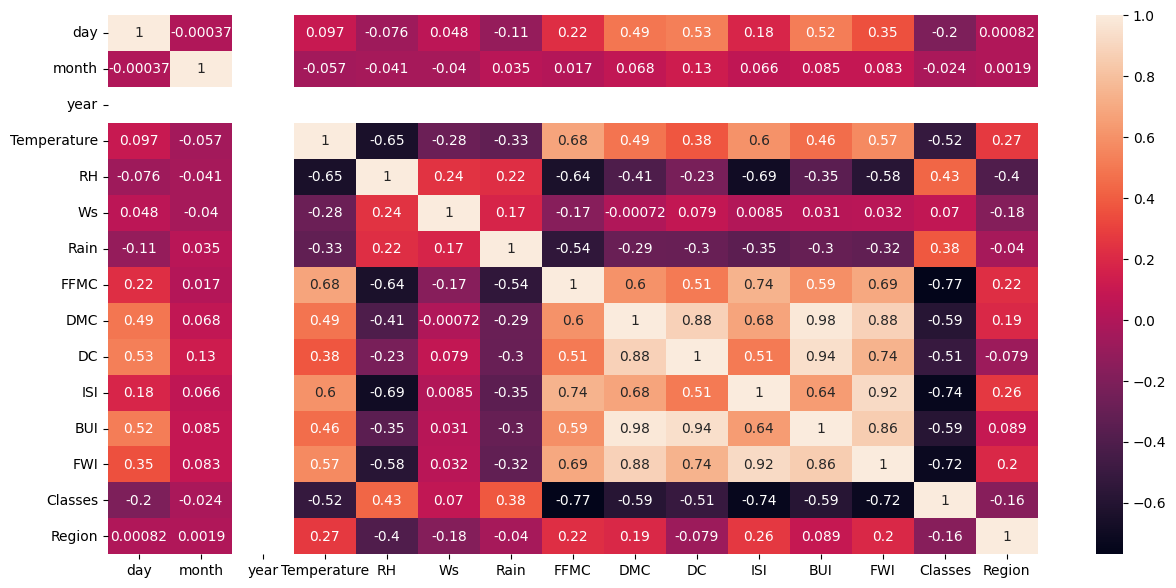

In [47]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [48]:
df = df.drop(["day", "year", "month"], axis=1)

In [49]:
df.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0.0


In [50]:
X = df.drop("FWI", axis=1) # all of them except FWI
y = df["FWI"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 15)

In [52]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.623928,-0.237764,-0.223241,0.610338,0.481099,0.363734,0.581952,0.451280,-0.475111,0.216710
RH,-0.623928,1.000000,0.196897,0.168767,-0.637180,-0.403957,-0.215877,-0.676579,-0.346685,0.428673,-0.374341
Ws,-0.237764,0.196897,1.000000,0.123057,-0.082272,0.024192,0.117648,0.057716,0.064573,0.001400,-0.193324
Rain,-0.223241,0.168767,0.123057,1.000000,-0.473994,-0.262317,-0.283759,-0.326372,-0.276420,0.357284,0.046380
FFMC,0.610338,-0.637180,-0.082272,-0.473994,1.000000,0.601768,0.495765,0.739712,0.587525,-0.773591,0.163152
DMC,0.481099,-0.403957,0.024192,-0.262317,0.601768,1.000000,0.871084,0.669227,0.980657,-0.566192,0.157019
DC,0.363734,-0.215877,0.117648,-0.283759,0.495765,0.871084,1.000000,0.484935,0.939412,-0.481952,-0.121117
ISI,0.581952,-0.676579,0.057716,-0.326372,0.739712,0.669227,0.484935,1.000000,0.630390,-0.728201,0.231097
BUI,0.451280,-0.346685,0.064573,-0.276420,0.587525,0.980657,0.939412,0.630390,1.000000,-0.565993,0.046612
Classes,-0.475111,0.428673,0.001400,0.357284,-0.773591,-0.566192,-0.481952,-0.728201,-0.565993,1.000000,-0.139360


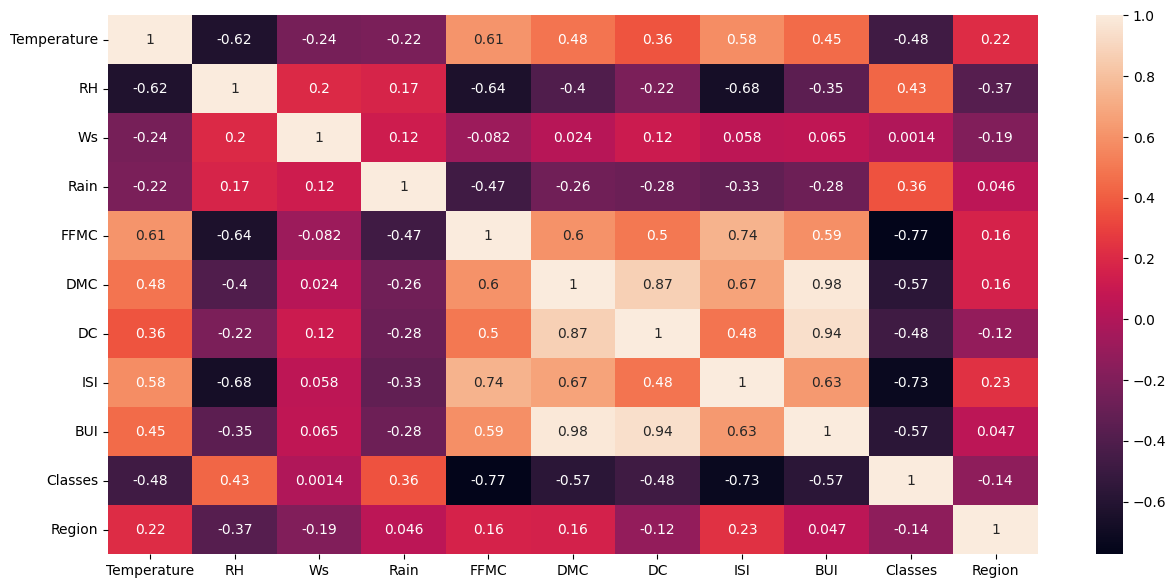

In [53]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(), annot= True)
plt.show()

In [54]:
def correlation_drop(df, threshold):
  columns_drop = set()
  corr = df.corr()
  for i in range(len(corr.columns)):
      for j in range(i):
          if abs(corr.iloc[i, j]) > threshold:
              columns_drop.add(corr.columns[i])
  return columns_drop

In [55]:
columns_dropping = correlation_drop(X_train, 0.85)

In [56]:
X_train.drop(columns_dropping, axis=1, inplace=True)

In [57]:
X_test.drop(columns_dropping, axis=1, inplace=True)

In [58]:
X_train.shape

(194, 9)

In [59]:
scaler = StandardScaler()

In [60]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

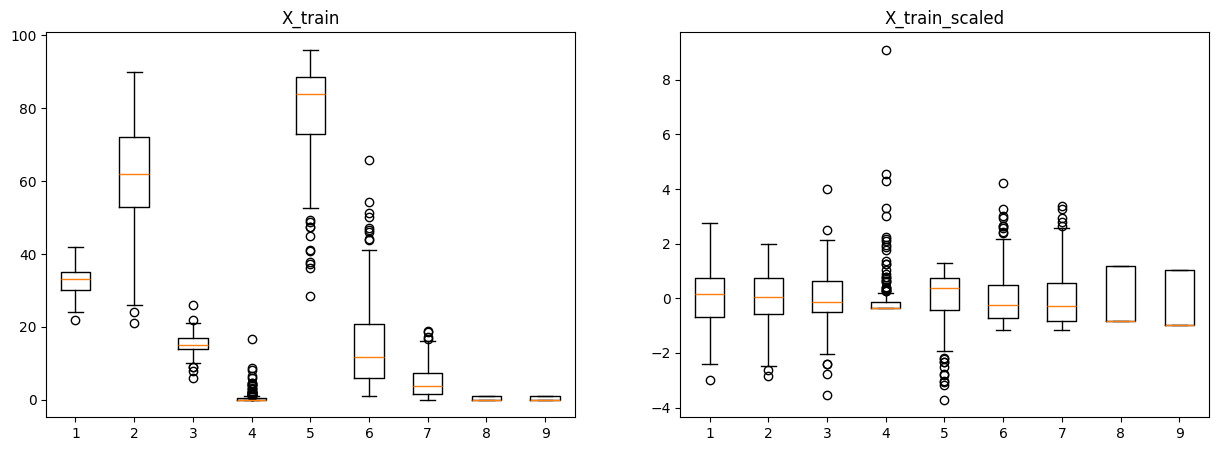

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(X_train)
plt.title("X_train")

plt.subplot(1,2,2)
plt.boxplot(X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
y_pred = linear_regression.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
print(score)

0.9837358124899278


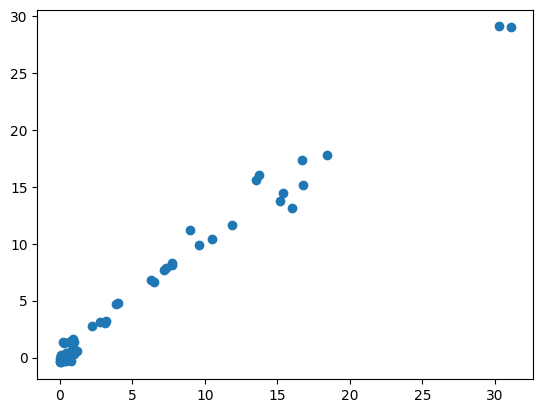

In [63]:
plt.scatter(y_test,y_pred )
plt.show()

In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
print(score)

0.9531407204103103


In [66]:
# lasso cross validation
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)
y_pred = lasso_cv.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
print(score)

0.9834751688838623


In [67]:
lasso_cv.alpha_

np.float64(0.02937913888188927)

In [69]:
lasso_cv.alphas_

array([6.78696213, 6.3295436 , 5.90295354, 5.50511423, 5.13408796,
       4.78806761, 4.46536788, 4.16441703, 3.88374926, 3.62199756,
       3.37788704, 3.15022876, 2.93791389, 2.73990832, 2.55524767,
       2.38303253, 2.22242412, 2.07264017, 1.93295116, 1.80267672,
       1.68118234, 1.56787628, 1.46220667, 1.36365883, 1.27175279,
       1.18604091, 1.10610572, 1.0315579 , 0.96203435, 0.89719645,
       0.83672841, 0.78033572, 0.7277437 , 0.67869621, 0.63295436,
       0.59029535, 0.55051142, 0.5134088 , 0.47880676, 0.44653679,
       0.4164417 , 0.38837493, 0.36219976, 0.3377887 , 0.31502288,
       0.29379139, 0.27399083, 0.25552477, 0.23830325, 0.22224241,
       0.20726402, 0.19329512, 0.18026767, 0.16811823, 0.15678763,
       0.14622067, 0.13636588, 0.12717528, 0.11860409, 0.11061057,
       0.10315579, 0.09620343, 0.08971965, 0.08367284, 0.07803357,
       0.07277437, 0.06786962, 0.06329544, 0.05902954, 0.05505114,
       0.05134088, 0.04788068, 0.04465368, 0.04164417, 0.03883

In [70]:
# ridge cross validation
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
print(score)

0.9834365267293491


In [72]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred = ridge_cv.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
print(score)

0.9834365267293491


In [76]:
# elasticnet cross validation
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
print(score)

0.8938431460122399


In [78]:
from sklearn.linear_model import ElasticNetCV
elasticnet_cv = ElasticNetCV(cv=5)
elasticnet_cv.fit(X_train_scaled, y_train)
y_pred = elasticnet_cv.predict(X_test_scaled)
score = r2_score(y_test, y_pred)
print(score)

0.9832131421043373
